In [78]:
import os
import numpy as np
import pandas as pd

file_path = './test_results.xlsx'

df_raw = pd.read_excel(file_path, engine='openpyxl')
df_raw = df_raw.loc[:, ~df_raw.columns.str.contains("Unnamed:")]

In [53]:
pivot_index = list(df_raw.columns[0:18]) # accuracy 전까지
pivot_index.remove('drift_model')
pivot_index.remove('n_rep')
pivot_index.remove('pruning')
pivot_index.remove('Gmax')
pivot_index.remove('Gmin')
pivot_index.remove('retrain')
pivot_index

['model',
 'dataset',
 'device',
 'IOparameter',
 'GDC',
 'mapping_scaling_omega',
 'noise_model',
 'pgm_noise_scale',
 'read_noise_scale',
 'drift_scale',
 'G_ratio',
 'inf_time']

In [97]:
df = df_raw.copy()

In [98]:
df = df[df['G_ratio']==25]
df = df[df['model']=='MLP']
df = df[df['GDC'] == 'on']
df = df[df['IOparameter'] == 'non-ideal']
df = df[df['pgm_noise_scale'] == 1]
# df = df[df['retrain'] == "X"]

In [99]:
df['pruning'].unique()

array([0.3, 0.4, 0.5, 0.6, 0.7, '-'], dtype=object)

In [100]:
df['p_drift_retrain'] = df['pruning'].astype(str) + '_' + df['drift_model'].astype(str) + '_' + df['retrain']
df['p_drift_retrain'].unique()

array(['0.3_log_X', '0.4_log_X', '0.5_log_X', '0.6_log_X', '0.7_log_X',
       '0.5_0.01_X', '-_0.01_X', '-_log_X', '0.3_0.01_X', '0.4_0.01_X'],
      dtype=object)

In [101]:
df_pivot = df.pivot_table(index=pivot_index, columns='p_drift_retrain', values='accuracy', aggfunc='mean')
df_pivot.reset_index(inplace=True) # index to columns

In [39]:
df_pivot

p_drift_retrain,model,dataset,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,...,0.6_linear_O,0.6_linear_X,0.6_log_O,0.6_log_X,0.7_0.01_O,0.7_0.01_X,0.7_linear_O,0.7_linear_X,0.7_log_O,0.7_log_X
0,MLP,MNIST,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,96.716995,96.617004,96.716995,96.617004,76.144005,95.785995,76.144005,95.785995,76.144005,95.785995
1,MLP,MNIST,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,97.226997,96.67099,97.287003,96.68,75.271004,95.761002,75.031998,95.787994,77.672997,95.759003
2,MLP,MNIST,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,96.278999,96.465004,96.531998,96.507004,77.627991,95.602005,76.612991,95.723,85.287994,95.619003
3,MLP,MNIST,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,95.842003,96.211998,96.356995,96.182999,75.036003,95.915001,71.451996,96.053001,89.229996,95.878998
4,MLP,MNIST,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,95.981003,96.420998,97.189003,96.444,76.062996,95.828995,72.706993,96.018997,92.67099,95.865005
5,MLP,MNIST,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,96.344002,96.073997,96.865997,95.938004,69.886993,95.850998,65.438004,96.140991,90.74099,95.873001
6,MLP,MNIST,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,95.230995,95.837997,96.329002,95.689995,70.444,96.152,65.432999,96.318993,92.000999,96.110008
7,MLP,MNIST,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,94.731995,95.186996,94.994003,94.841995,64.389,95.574997,56.842003,95.880005,91.72699,95.589989
8,MLP,MNIST,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,93.098,95.150002,94.033005,94.816994,65.202995,95.481003,53.924,95.618004,90.591003,95.176987
9,MLP,MNIST,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,89.555,93.876999,92.431992,93.565994,65.093002,95.514,52.275002,95.479004,89.420998,95.180992


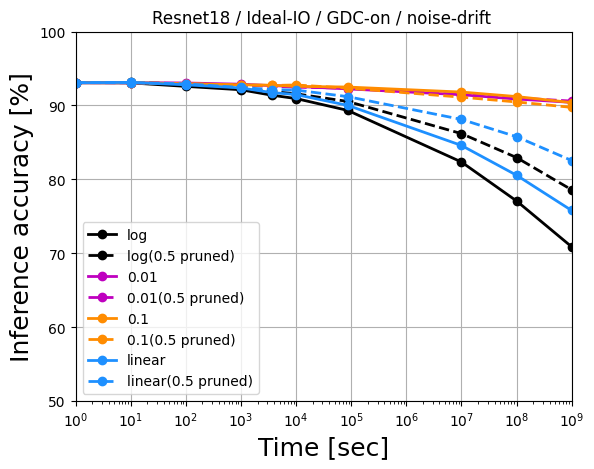

In [47]:
import matplotlib.pyplot as plt

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['-_log'], marker='o', label = 'log', linewidth=2, color='k')
plt.plot(x,df_pivot['0.5_log'], marker='o', label = 'log(0.5 pruned)', linestyle='--', linewidth=2, color='k')
plt.plot(x,df_pivot['-_0.01'], marker='o', label = '0.01', linewidth=2, color='m')
plt.plot(x,df_pivot['0.5_0.01'], marker='o', label = '0.01(0.5 pruned)', linestyle='--',linewidth=2, color='m')
plt.plot(x,df_pivot['-_0.1'], marker='o', label = '0.1', linewidth=2, color='darkorange')
plt.plot(x,df_pivot['0.5_0.1'], marker='o', label = '0.1(0.5 pruned)', linestyle='--',linewidth=2, color='darkorange')
plt.plot(x,df_pivot['-_linear'], marker='o', label = 'linear', linewidth=2, color='dodgerblue')
plt.plot(x,df_pivot['0.5_linear'], marker='o', label = 'linear(0.5 pruned)', linestyle='--',linewidth=2, color='dodgerblue')


plt.title("Resnet18 / Ideal-IO / GDC-on / noise-drift ")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(50,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

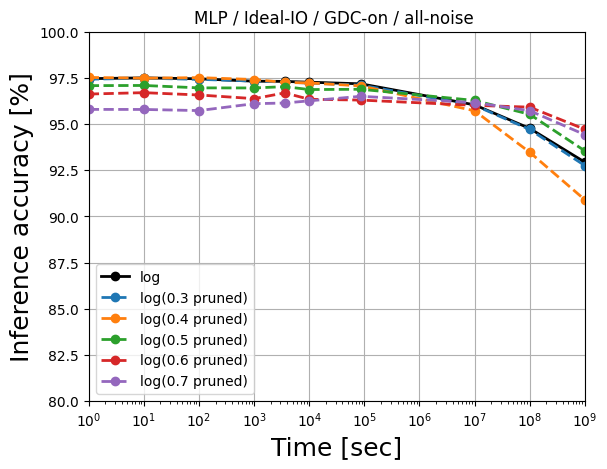

In [87]:
import matplotlib.pyplot as plt

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['-_log_X'], marker='o', label = 'log', linewidth=2, color='k')
plt.plot(x,df_pivot['0.3_log_X'], marker='o', label = 'log(0.3 pruned)', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.4_log_X'], marker='o', label = 'log(0.4 pruned)', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.5_log_X'], marker='o', label = 'log(0.5 pruned)', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.6_log_X'], marker='o', label = 'log(0.6 pruned)', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.7_log_X'], marker='o', label = 'log(0.7 pruned)', linestyle='--', linewidth=2)
# plt.plot(x,df_pivot['0.3_log_O'], marker='o', label = 'log(0.3 retrained)', linestyle='--', linewidth=2)
# plt.plot(x,df_pivot['0.4_log_O'], marker='o', label = 'log(0.4 retrained)', linestyle='--', linewidth=2)


# plt.plot(x,df_pivot['-_0.01_X'], marker='o', label = '0.01', linewidth=2, color='m')
# # plt.plot(x,df_pivot['0.3_0.01_X'], marker='o', label = '0.01(0.3 pruned)', linestyle='--',linewidth=2)
# plt.plot(x,df_pivot['0.4_0.01_X'], marker='o', label = '0.01(0.4 pruned)', linestyle='--',linewidth=2, color='m')
# plt.plot(x,df_pivot['0.5_0.01_X'], marker='o', label = '0.01(0.5 pruned)', linestyle='--',linewidth=2)


# plt.plot(x,df_pivot['-_linear_X'], marker='o', label = 'linear', linewidth=2, color='dodgerblue')
# plt.plot(x,df_pivot['0.3_linear_X'], marker='o', label = 'linear(0.3 pruned)', linestyle='--',linewidth=2)
# plt.plot(x,df_pivot['0.4_linear_X'], marker='o', label = 'linear(0.4 pruned)', linestyle='--',linewidth=2)
# plt.plot(x,df_pivot['0.5_linear_X'], marker='o', label = 'linear(0.5 pruned)', linestyle='--',linewidth=2)
# plt.plot(x,df_pivot['0.6_linear_X'], marker='o', label = 'linear(0.6 pruned)', linestyle='--',linewidth=2)


plt.title("MLP / Ideal-IO / GDC-on / all-noise ")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(80,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

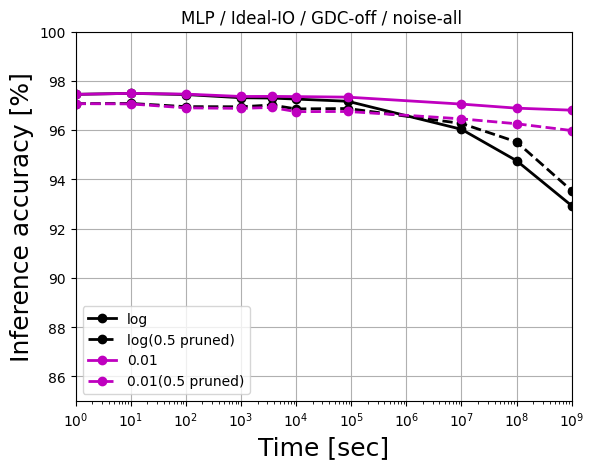

In [96]:
import matplotlib.pyplot as plt

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['-_log_X'], marker='o', label = 'log', linewidth=2, color='k')
# plt.plot(x,df_pivot['0.3_log_X'], marker='o', label = 'log(0.3 pruned)', linestyle='--', linewidth=2)
# plt.plot(x,df_pivot['0.4_log_X'], marker='o', label = 'log(0.4 pruned)', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.5_log_X'], marker='o', label = 'log(0.5 pruned)', linestyle='--', linewidth=2, color='k')
# plt.plot(x,df_pivot['0.6_log_X'], marker='o', label = 'log(0.6 pruned)', linestyle='--', linewidth=2)
# plt.plot(x,df_pivot['0.7_log_X'], marker='o', label = 'log(0.7 pruned)', linestyle='--', linewidth=2)
# plt.plot(x,df_pivot['0.3_log_O'], marker='o', label = 'log(0.3 retrained)', linestyle='--', linewidth=2)
# plt.plot(x,df_pivot['0.4_log_O'], marker='o', label = 'log(0.4 retrained)', linestyle='--', linewidth=2)


plt.plot(x,df_pivot['-_0.01_X'], marker='o', label = '0.01', linewidth=2, color='m')
# plt.plot(x,df_pivot['0.3_0.01_X'], marker='o', label = '0.01(0.3 pruned)', linestyle='--',linewidth=2)
# plt.plot(x,df_pivot['0.4_0.01_X'], marker='o', label = '0.01(0.4 pruned)', linestyle='--',linewidth=2)
plt.plot(x,df_pivot['0.5_0.01_X'], marker='o', label = '0.01(0.5 pruned)', linestyle='--',linewidth=2, color='m')
# plt.plot(x,df_pivot['0.6_0.01_X'], marker='o', label = '0.01(0.6 pruned)', linestyle='--',linewidth=2)


# plt.plot(x,df_pivot['-_linear_X'], marker='o', label = 'linear', linewidth=2, color='dodgerblue')
# plt.plot(x,df_pivot['0.3_linear_X'], marker='o', label = 'linear(0.3 pruned)', linestyle='--',linewidth=2)
# plt.plot(x,df_pivot['0.4_linear_X'], marker='o', label = 'linear(0.4 pruned)', linestyle='--',linewidth=2)
# plt.plot(x,df_pivot['0.5_linear_X'], marker='o', label = 'linear(0.5 pruned)', linestyle='--',linewidth=2)
# plt.plot(x,df_pivot['0.6_linear_X'], marker='o', label = 'linear(0.6 pruned)', linestyle='--',linewidth=2)


plt.title("MLP / Ideal-IO / GDC-off / noise-all ")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(85,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

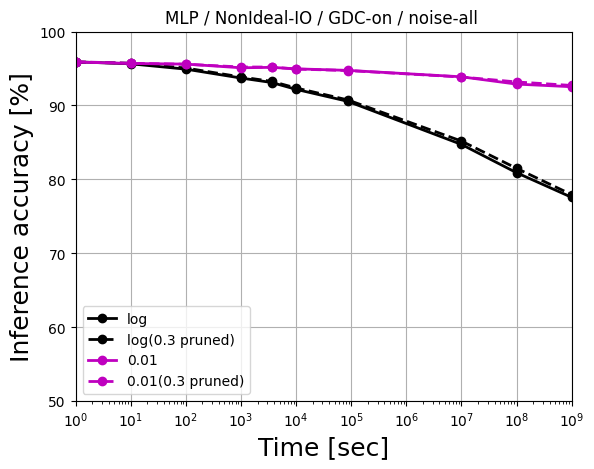

In [112]:
import matplotlib.pyplot as plt

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['-_log_X'], marker='o', label = 'log', linewidth=2, color='k')
plt.plot(x,df_pivot['0.3_log_X'], marker='o', label = 'log(0.3 pruned)', linestyle='--', linewidth=2, color='k')
# plt.plot(x,df_pivot['0.4_log_X'], marker='o', label = 'log(0.4 pruned)', linestyle='--', linewidth=2)
# plt.plot(x,df_pivot['0.5_log_X'], marker='o', label = 'log(0.5 pruned)', linestyle='--', linewidth=2)
# plt.plot(x,df_pivot['0.6_log_X'], marker='o', label = 'log(0.6 pruned)', linestyle='--', linewidth=2)
# plt.plot(x,df_pivot['0.7_log_X'], marker='o', label = 'log(0.7 pruned)', linestyle='--', linewidth=2)

plt.plot(x,df_pivot['-_0.01_X'], marker='o', label = '0.01', linewidth=2, color='m')
plt.plot(x,df_pivot['0.3_0.01_X'], marker='o', label = '0.01(0.3 pruned)', linestyle='--',linewidth=2, color='m')
# plt.plot(x,df_pivot['0.4_0.01_X'], marker='o', label = '0.01(0.4 pruned)', linestyle='--',linewidth=2)
# plt.plot(x,df_pivot['0.5_0.01_X'], marker='o', label = '0.01(0.5 pruned)', linestyle='--',linewidth=2)
# plt.plot(x,df_pivot['0.6_0.01_X'], marker='o', label = '0.01(0.6 pruned)', linestyle='--',linewidth=2)


plt.title("MLP / NonIdeal-IO / GDC-on / noise-all ")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(50,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()